In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)#不設也可以

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data() #載入資料

In [3]:
print("訓練資料長相：",x_train.shape) #四維array，第一項代表筆數，第二三項代表32X32的圖片，第四項代表三原色
print("訓練解答長相：",y_train.shape)

訓練資料長相： (50000, 32, 32, 3)
訓練解答長相： (50000, 1)


In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
print("訓練資料筆數：",x_train.shape[0])
print("測試資料筆數：",x_test.shape[0])

訓練資料筆數： 50000
測試資料筆數： 10000


In [7]:
x_train_nor = x_train.astype("float32")/255.0 #標準化，並把資料型態轉成float
x_test_nor = x_test.astype("float32")/255.0

In [8]:
x_train_nor[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [9]:
from keras.utils import np_utils #引進分類帽

In [10]:
y_train_oh = np_utils.to_categorical(y_train) #轉變解答的型態
y_test_oh = np_utils.to_categorical(y_test)

In [11]:
y_train_oh[0] #變成這樣

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
y_train_oh.shape

(50000, 10)

In [13]:
#從keras裡抄傢伙
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [14]:
model = Sequential() #模型起手式

In [15]:
#第一層卷積層，簡單來說就是將一張圖片切成32塊，之後從裡面找特徵值會比一整張圖片來的容易
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (32,32,3)
                ,activation = "relu", padding = "same"))

In [16]:
#不需要每次都把資料全吃進去可以掉一些
model.add(Dropout(rate= 0.25))

In [17]:
#池化層，就是取單位中最大的值，可以不用理其他沒這麼重要的資料
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation = "relu", padding = "same"))

In [19]:
model.add(Dropout(rate= 0.25))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
#把剛剛做的一系列轉換變成一維的長相，model比較好吃
model.add(Flatten())

In [22]:
model.add(Dropout(rate=0.25))

In [23]:
model.add(Dense(1024, activation="relu"))

In [24]:
model.add(Dropout(rate=0.25))

In [25]:
#輸出結果的樣子，要長得像剛剛轉換過後的答案，softmax可以把輸出變成加起來為1的結果
model.add(Dense(10, activation="softmax"))

In [26]:
#看看你的模型現在長什麼樣
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [27]:
#訓練前最後準備
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
#訓練起來
training = model.fit(x_train_nor, y_train_oh, epochs=10, batch_size=9184, validation_data=(x_test_nor, y_test_oh))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 436s 9ms/step - loss: 2.6169 - acc: 0.1343 - val_loss: 2.2717 - val_acc: 0.1663
Epoch 2/10
50000/50000 [==============================] - 295s 6ms/step - loss: 2.2285 - acc: 0.1909 - val_loss: 2.1803 - val_acc: 0.2127

In [29]:
#看看準確率是多少
score = model.evaluate(x_test_nor, y_test_oh)
print("預測成功率：", score[1])

10000/10000 [==============================] - 11s 1ms/step

In [30]:
#畫圖囉
import matplotlib.pyplot as plt

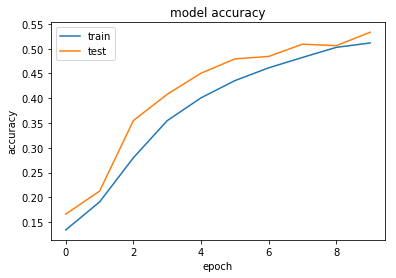

In [31]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

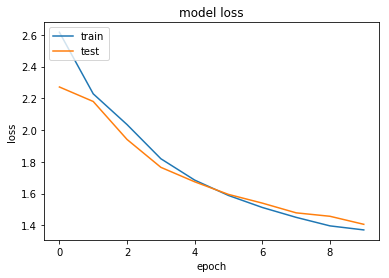

In [32]:
# summarize history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# 模型存檔
model.save('cifar10_group2.h5') 

In [34]:
#看看預測結果（單一）
prediction = model.predict_classes(x_test_nor)

In [35]:
print("預測結果：", prediction[:10])
print("原本答案：", y_test[:10])

預測結果： [3 8 8 8 6 6 1 6 3 1]
原本答案： [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [36]:
#看看預測結果（機率）
prediction_probability = model.predict(x_test_nor)

In [37]:
print("預測結果：", prediction_probability[0])
print("原本答案：", y_test_oh[0])

預測結果： [0.02389808 0.01380219 0.08294939 0.3583564  0.03044059 0.20861243
 0.20806144 0.01407487 0.04524409 0.01456052]
原本答案： [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [38]:
#補個LABEL數字跟圖片的關係
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

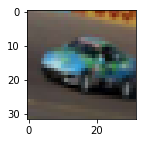

神經網路： automobile
正確答案： automobile
airplane 預測機率：0.177481294
automobile 預測機率：0.492620111
bird 預測機率：0.058906414
cat 預測機率：0.014314238
deer 預測機率：0.017214328
dog 預測機率：0.007139745
frog 預測機率：0.026685659
horse 預測機率：0.007982234
ship 預測機率：0.096291751
truck 預測機率：0.101364248


In [39]:
#來看看圖片以及預測結果
from ipywidgets import interact_manual
def identify(testnumber):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[testnumber])
    plt.show()
    print("神經網路：",LABELS[prediction[testnumber]])
    print("正確答案：",LABELS[y_test[testnumber][0]])
    for j in range(10):
        print(LABELS[j],"預測機率：%1.9f" %(prediction_probability[testnumber][j]))
interact_manual(identify, testnumber=(0,10000-1))

In [40]:
#用用熊貓套件
import pandas as pd

In [41]:
#先整理整理資料形狀
y_test_res = y_test.reshape(-1)

In [42]:
#來看看預測和實際結果的出入
print(LABELS)
pd.crosstab(y_test_res, prediction, rownames=["answer"], colnames=["predict"])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


predict,0,1,2,3,4,5,6,7,8,9
answer,,,,,,,,,,
0,522,40,83,33,8,2,40,15,189,68
1,21,631,14,18,0,1,37,18,55,205
2,62,8,455,88,60,52,189,42,24,20
3,12,8,124,428,30,81,224,45,14,34
4,25,9,199,79,292,12,278,79,17,10
5,8,3,139,261,46,294,134,82,18,15
6,4,4,65,49,20,6,824,10,6,12
7,13,6,58,88,51,50,105,560,11,58
8,79,70,32,31,5,1,22,11,684,65


In [43]:
from keras.models import load_model
model_load = load_model('cifar10_group2.h5')

In [44]:
from PIL import Image
import numpy as np

In [45]:
im = Image.open("dog.jpg")

In [46]:
im2 = im.resize((32,32))

In [47]:
B = np.array(im2)

In [48]:
B_nor = B.astype("float32")/255.0

In [49]:
B_res = B_nor.reshape(1,32,32,3)

In [50]:
apple_pre = model_load.predict(B_res)

In [51]:
apple_pre

array([[0.06443547, 0.0365354 , 0.02254548, 0.08636432, 0.02897355,
        0.03553353, 0.44606033, 0.1665779 , 0.01383005, 0.09914389]],
      dtype=float32)

In [52]:
apple_pre_class = model_load.predict_classes(B_res)

In [53]:
apple_pre_class

array([6])